In [1]:
# Numbering the equations

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>


## Modes propres de vibration d’un diapason

En première approximation, on peut modéliser un diapason comme l’assemblage de deux poutres, chacune de ces poutres possédant une extrémité fixe et une extrémité libre. Les vibrations $y(x)$ transverses le long de chaque barre vérifient l’équation suivante :
$$
\dfrac{\partial^{4}y}{\partial x^{4}}=-\dfrac{\rho}{E\kappa^{2}}\dfrac{\partial^{2}y}{\partial t^{2}}
$$

Avec les conditions limites suivantes où la barre est fixe à l'extrémité $x=0$ et libre en $x=L$ qui sont : 

\begin{eqnarray*}
y(x=0)=0 \quad & \quad\left.\dfrac{\partial^{2}y}{\partial x^{2}}\right|_{x=L}\!\!=0 \\
\left.\dfrac{\partial y}{\partial x}\right|_{x=0}\!\!=0\quad & \quad\left.\dfrac{\partial^{3}y}{\partial x^{3}}\right|_{x=L}\!\!=0, 
\end{eqnarray*}

on peut montrer que les fréquences $\nu_{i}$ des modes propres sont déterminées par l'équation suivante : 

\begin{equation}
\nu_{i}=\dfrac{\pi}{2\ell^{2}}\sqrt{\dfrac{E\kappa^{2}}{\rho}}\,\beta_{i}^{2}
\end{equation}

où $\beta_{i}$ est solution de 

\begin{equation}
\label{eq:diapason}
\cosh{(\pi\beta_{i})}\cos{(\pi\beta_{i})}=-1
\end{equation}

et $E$ est le module d'Young du matériau, $\rho$ sa masse volumique, $\ell$ la longueur du diapason et $\kappa$ 
une constante caractéristique de la section du diapason. Les caractéristiques d'un diapason en fer sont listées dans la table ci-dessous :

Nom      | Valeur      &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
------|------|
densité | $\rho= 7874\,\text{kg}/\text{m}^{3}$ |
**Module d'Young** | $E=196\,\text{GPa}$ |
Section circulaire | $r=5\,\text{mm}$ |
constante | $\kappa=r/2=2.5\,\text{mm}$| 
longueur |  $\ell=12.6\,\text{cm}$ | 


1. Pour trouver les fréquences propres du diapason, il faut trouver les zéros de la fonction $f(\beta)=\cosh(\pi\beta)\cos(\pi\beta)+1$.
On notera $\beta_{1}$,  $\beta_{2}$, … les racines positives par ordre croissant. Cette fonction ayant des variations très importantes autour du zéro, on cherchera plutôt les zéros de la fonction 
\begin{equation}
g(\beta)= f(\beta) \exp^{-\pi\beta}.
\end{equation} 

Pourquoi est-ce que les zéros de $g$ sont les mêmes que ceux de $f$ ? Tracez les fonctions $f(\beta)$ et $g(\beta)$, et proposez l'expression analytique vers laquelle tend $\beta_{i}$ pour les grandes valeurs de $i$.

2.  Recherchez les premières solutions $\beta_{1}$, $\beta_{2}$, $\beta_{3}$ de l'équation (\ref{eq:diapason}) à l'aide de la méthode de la dichotomie. Déduisez-en la fréquence $\nu_{1}$ du fondamental et les fréquences $\nu_{2}$, $\nu_{3}$, $\ldots$ des premiers harmoniques du diapason considéré.

3.  Essayez d'appliquer la méthode de Newton-Raphson à ce problème. Commentez. Comparez notamment la vitesse de convergence des deux méthodes, et essayez différentes valeurs de l'initialisation (des valeurs entières, et des valeurs non entières).

## Solution

In [3]:
import numpy as np
import matplotlib.pyplot as plt

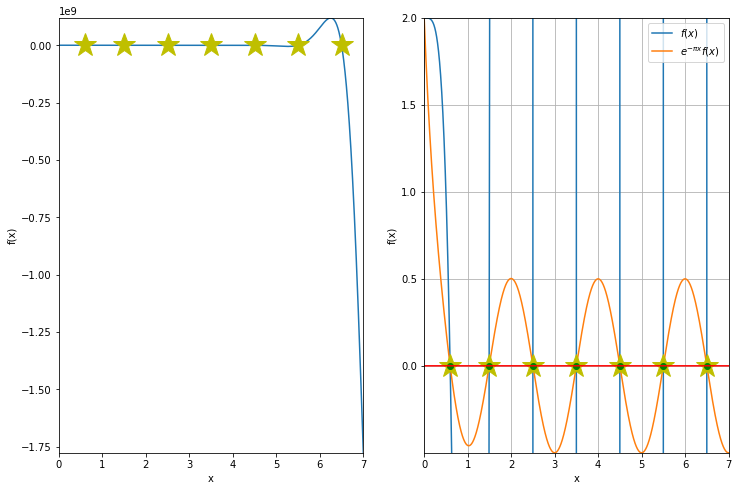

In [4]:
# 1

# Définition des fonctions à étudier
def f(x):
    return np.cosh(np.pi * x) * np.cos(np.pi * x) + 1

def g(x):
    return f(x) * np.exp(-np.pi * x)

# Calcul des fonctions
x =  np.linspace(0, 7, 10000)
y_f = f(x)
y_g = g(x)

plt.figure(figsize = (12, 8))

## Graphe de f
plt.subplot(121)
plt.plot(x, y_f, '-', label = r'$f(x)$')

# Recherche et tracé des zéros de f
idx = np.argwhere(np.diff(np.sign(y_f))).flatten()
plt.plot(x[idx], y_g[idx], '*y', markersize = 24)

# Cosmétique
plt.xlim(min(x), max(x))
plt.ylim(min(y_f), max(y_f))
plt.xlabel("x")
plt.ylabel("f(x)")

## Graphes de f et g
plt.subplot(122)
plt.plot(x, y_f, '-', label = r'$f(x)$')
plt.plot(x, y_g, '-', label = r'$e^{-\pi x}f(x)$')

# Recherche et tracé des zéros de f et de g
idx_f = np.argwhere(np.diff(np.sign(y_f))).flatten()
plt.plot(x[idx_f], y_g[idx_f], '*y', markersize = 24)
idx_g = np.argwhere(np.diff(np.sign(y_g))).flatten()
plt.plot(x[idx_g], y_g[idx_g], 'og')

# Cosmétique
plt.plot(x, 0 * x, '-r')
plt.grid()
plt.xlim(min(x), max(x))
plt.ylim(min(y_g), max(y_g))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.show()

Cherchons analytiquement la forme des zéros de $f$ et $g$ (qui ont les mêmes zéros car $\forall\beta\in\mathbb{R}, e^{-\pi\beta}>0$) en regardant le comportement asymptotique de $g$ quand $\beta\to+\infty$.
$$ \cosh(\pi\beta) = \frac{e^{\pi\beta} + e^{-\pi\beta}}{2} $$
$$ f(\beta) \sim \frac{1}{2} e^{\pi\beta} \cos(\pi\beta) + 1 $$
$$ g(\beta) = f(\beta) \times e^{-\pi\beta} \sim \left(\frac{1}{2} e^{\pi\beta} \cos(\pi\beta) + 1\right) \times e^{-\pi\beta} $$
$$ g(\beta) \sim \frac{1}{2}\cos(\pi\beta) $$
On conjecture donc que les racines de $g$ ont la forme suivante (approximation qui serait de moins en moins mauvaise à mesure que $\beta$ s'approche de $+\infty$) :
$$ \beta_n \approx n + \frac{1}{2}, n\in\mathbb{N} $$

In [5]:
print(x[idx_g])
print(x[idx_g] - (0.5 + np.arange(len(x[idx_g]))))

[0.59645965 1.49394939 2.49994999 3.49964996 4.49934993 5.49974997
 6.49944994]
[ 9.64596460e-02 -6.05060506e-03 -5.00050005e-05 -3.50035004e-04
 -6.50065007e-04 -2.50025003e-04 -5.50055006e-04]


Les zéros de $\cosh(\pi x) \cos(\pi x) + 1$ semblent donc effectivement avoir la forme $n + \frac{1}{2}, n\in\mathbb{N}$.

L'effet du $+1$ est de décaler ces zéros une fois à gauche, une fois à droite. On pourra chercher les solutions dans les intervalles $[n, n + 1]$.

In [6]:
# 2

def dichotomie(f, a, b, eps, cmax):
    """ Méthode de dichotomie améliorée avec la prise en compte d'un compteur et un critère de convergence sur x """
    # Vérification initiales
    if np.isclose(f(a), 0, eps):
        return a, 0
    elif np.isclose(f(b), 0, eps):
        return b, 0
    elif f(a) * f(b) >= 0:
        print("Pas de zéro unique dans l'intervalle [", a, ";", b, "]")
        return float('NaN'), 0 # None
    else:
        # Dichotomie
        compteur = 1
        while b - a > eps and compteur <= cmax:
            c = (a + b) / 2
            if np.isclose(f(c), 0):
                return c, compteur
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
            compteur += 1
        if compteur > cmax:
            print("Limite du compteur atteinte")
        return c, compteur

def nu(beta, l, E, kappa, rho):
    """ Calcule la fréquence à partir d'une valeur de beta et des paramètres du diapason. """
    return np.pi / (2 * l ** 2) * np.sqrt(E * kappa ** 2 / rho) * beta ** 2

eps = 1.e-8
cmax = 100

rho = 7874 # kg/m^3
E = 196e9 # Pa
r = 5e-3 # m
kappa = r / 2 # m
l = 12.6e-2 # m

for i in range(10):
    a = i
    b = i + 1
    betai, compteur = dichotomie(f, a, b, eps, cmax)
    print("beta =", betai, "et nu =", nu(betai, l, E, kappa, rho), "Hz, convergence en", compteur, "étapes.")

beta = 0.5968641564249992 et nu = 439.642960573086 Hz, convergence en 28 étapes.
beta = 1.4941756203770638 et nu = 2755.195483835817 Hz, convergence en 28 étapes.
beta = 2.500246949493885 et nu = 7714.627091902654 Hz, convergence en 28 étapes.
beta = 3.4999893233180046 et nu = 15117.590077171551 Hz, convergence en 28 étapes.
beta = 4.500000454485416 et nu = 24990.45947777287 Hz, convergence en 28 étapes.
beta = 5.499999977648258 et nu = 37331.41927698605 Hz, convergence en 28 étapes.
beta = 6.500000007450581 et nu = 52140.57788060333 Hz, convergence en 28 étapes.
beta = 7.499999992549419 et nu = 69417.92883392007 Hz, convergence en 28 étapes.
beta = 8.50000000745058 et nu = 89163.47336903086 Hz, convergence en 28 étapes.
beta = 9.49999999254942 et nu = 111377.21030900953 Hz, convergence en 28 étapes.


In [7]:
# 3

def newton_raphson(f, fprime, x, eps, cmax):
    """ Méthode de Newton-Raphson améliorée avec la prise en compte du compteur. """
    compteur = 0
    while abs(f(x)) > eps and compteur < cmax:
        compteur = compteur + 1
        x = x - f(x) / fprime(x)
    return x, compteur

def df(x):
    return np.pi * (np.sinh(np.pi * x) * np.cos(np.pi * x) - np.cosh(np.pi * x) * np.sin(np.pi * x))

def dg(x):
    return df(x) * np.exp(-np.pi * x) - np.pi * f(x) * np.exp(-np.pi * x)

In [8]:
for i in range(10):
    x0 = i
    betai, compteur = newton_raphson(g, dg, x0, eps, cmax)
    print("beta =", betai, "et nu =", nu(betai, l, E, kappa, rho), "Hz, convergence en", compteur, "étapes.")

beta = 0.5968641626916722 et nu = 439.64296980499796 Hz, convergence en 5 étapes.
beta = -2.5002469461666976 et nu = 7714.627071370273 Hz, convergence en 6 étapes.
beta = 87.50000000000001 et nu = 9448551.443389487 Hz, convergence en 4 étapes.
beta = nan et nu = nan Hz, convergence en 2 étapes.
beta = 45642.04808203566 et nu = 2570865606383.406 Hz, convergence en 1 étapes.
beta = nan et nu = nan Hz, convergence en 2 étapes.
beta = 24438716.227437552 et nu = 7.370651936416909e+17 Hz, convergence en 1 étapes.
beta = nan et nu = nan Hz, convergence en 2 étapes.
beta = 13087217993.133287 et nu = 2.113702197455023e+23 Hz, convergence en 1 étapes.
beta = nan et nu = nan Hz, convergence en 2 étapes.


<ipython-input-4-571d74e5fd22>:5: RuntimeWarning: overflow encountered in cosh
  return np.cosh(np.pi * x) * np.cos(np.pi * x) + 1
<ipython-input-4-571d74e5fd22>:8: RuntimeWarning: overflow encountered in exp
  return f(x) * np.exp(-np.pi * x)
<ipython-input-7-39829e08b043>:12: RuntimeWarning: overflow encountered in sinh
  return np.pi * (np.sinh(np.pi * x) * np.cos(np.pi * x) - np.cosh(np.pi * x) * np.sin(np.pi * x))
<ipython-input-7-39829e08b043>:12: RuntimeWarning: overflow encountered in cosh
  return np.pi * (np.sinh(np.pi * x) * np.cos(np.pi * x) - np.cosh(np.pi * x) * np.sin(np.pi * x))
<ipython-input-7-39829e08b043>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.pi * (np.sinh(np.pi * x) * np.cos(np.pi * x) - np.cosh(np.pi * x) * np.sin(np.pi * x))
<ipython-input-7-39829e08b043>:15: RuntimeWarning: overflow encountered in exp
  return df(x) * np.exp(-np.pi * x) - np.pi * f(x) * np.exp(-np.pi * x)
<ipython-input-4-571d74e5fd22>:8: RuntimeWarning: inv

In [9]:
for i in range(10):
    x0 = i + 0.2
    betai, compteur = newton_raphson(g, dg, x0, eps, cmax)
    print("beta =", betai, "et nu =", nu(betai, l, E, kappa, rho), "Hz, convergence en", compteur, "étapes.")

beta = 0.5968641614285567 et nu = 439.64296794420653 Hz, convergence en 4 étapes.
beta = 1.494175614284537 et nu = 2755.1954613671037 Hz, convergence en 4 étapes.
beta = 2.5002469461666834 et nu = 7714.627071370186 Hz, convergence en 4 étapes.
beta = 3.4999893198474448 et nu = 15117.590047190602 Hz, convergence en 4 étapes.
beta = 4.500000461515085 et nu = 24990.459555850484 Hz, convergence en 4 étapes.
beta = 5.499999980056095 et nu = 37331.41930967259 Hz, convergence en 4 étapes.
beta = 6.500000000861854 et nu = 52140.5777748987 Hz, convergence en 4 étapes.
beta = 7.499999999962757 et nu = 69417.92897115168 Hz, convergence en 4 étapes.
beta = 8.50000000000161 et nu = 89163.4732127541 Hz, convergence en 4 étapes.
beta = 9.49999999999993 et nu = 111377.21048370788 Hz, convergence en 4 étapes.


La méthode de Newton-Raphson converge bien plus vite que la dichotomie (27 étapes contre 4 étapes). Ce n'est pas très étonnant puisque le cosinus est très bien approximé par une droite au voisinage des racines.

Mais il faut faire très attention à la façon dont on choisit la valeur initiale. Ici, en choisissant $\beta\in\mathbb{N}$, la dérivée de $g$ est nulle ou presque, donc ce n'est pas très étonnant qu'on obtienne des résultats aberrants. En se plaçant en des valeurs arbitrairement décalée de $0.2$, on n'a plus ce problème.